# **Project Name**    -



##### **Project Type**    - EDA: Uber Demand Supply Analysis
##### **Contribution**    - Individual: Somnath Kayal
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Most of the cancellation done in the city area.
Most of the No cars found occer in the Airport area.

According to the analysis one of the main reasons is the unavailability of cabs in city during the 'Morning', 'Mid_Night' and the cancellation of cabs by drivers in the Early morning

According to the analysis one of the main reasons is the unavailability of cabs in airport during the 'Evening', 'Late_Evening','Early_Night' and the cancellation of cabs by drivers in the 'Evening' and 'Late Evening'

Maximum car request on airport from 5pm to 11pm

Maximum car request on city from 4am to 10am

# **GitHub Link -**

https://github.com/SomInd101/UberSupplyDemand.git

# **Problem Statement**


**Write Problem Statement Here.**
***1. Identify the Peak Demand Time Periods***

***2. Analyze the Supply-Demand Gap:*** *Identify time slots and pickup points (City vs Airport) where Uber has more requests than available drivers.*

***3. Explore Cancellation Patterns:*** *Identify when and where ride cancellations occur the most.*

***4. Investigate "No Cars Available" Issues:*** *Pinpoint peak times when users are not getting rides due to no available drivers.*

***5. Measure Average Driving Time (for Completed Rides):*** *Calculate time between Request timestamp and Drop timestamp.*

***6. Compare City vs Airport Ride Dynamics:*** *Compare request patterns, cancellation rates, and supply gaps between City and Airport pickups.*

***7. Understand Impact of Time Slots:*** *Identify which parts of the day need service improvement.*

#### **Define Your Business Objective?**

**1. : Helps Uber allocate more drivers during high-demand hours.**

**2. Critical for driver planning and reducing lost revenue.**

**3. Understand customer or driver behavior to reduce friction.**

**4. Helps optimize driver distribution.**

**5. Short driving times might increases driver revenue/ Long driving times might helps passengers to save money**

**6. Reveals differences in rider behavior and service level.**

**7. Identify which parts of the day need service improvement.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta
import random

### Dataset Loading

In [2]:
# Load Dataset
file_path= r"D:/Data Analytics/Intership/Labmentix/Uber Supply Demand/"
df =pd.read_csv(fr"{file_path}EDA_UberRequestData.csv")

In [3]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(6745, 6)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df_null= df.isnull().sum()
df_null

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

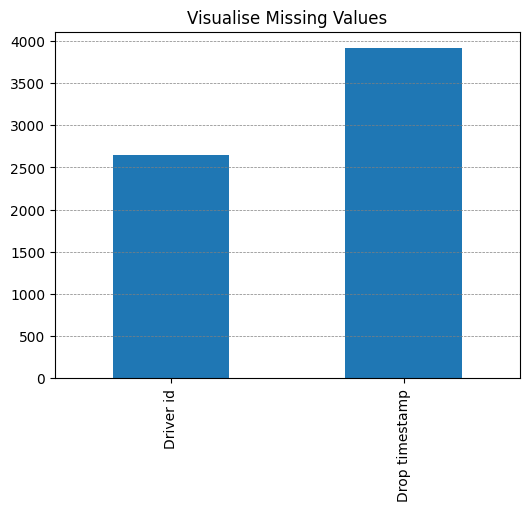

In [9]:
# Visualizing the missing values
df_null= df_null[df_null>0]
df_null.plot.bar(figsize= (6,4.5))
plt.title('Visualise Missing Values')
plt.grid(visible = True,axis ='y',color='gray', linestyle='--', linewidth=0.5)

### Extra Information:

In [10]:
df['Driver id'].value_counts(normalize = False, ascending = False) # Checking the trip completed by each Drivers

Driver id
27.0     22
22.0     21
70.0     21
84.0     21
177.0    21
         ..
208.0     8
123.0     7
42.0      7
265.0     6
300.0     6
Name: count, Length: 300, dtype: int64

In [11]:
df.Status.value_counts() # Checking the different "Status"

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [12]:
df.value_counts(subset= 'Pickup point') # Checking the different "Pickup point"

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

In [13]:
df.value_counts().sum()  # Checking the total not null cells

np.int64(2831)

In [14]:
df.isnull().sum().sum() # Checking the total null cells

np.int64(6564)

In [15]:
## Checking null values percentage
df_null_percent= (df.isnull().sum().sum()/df.value_counts().sum())*100
print(f"Total null values percentage present in the dataset: {df_null_percent}")

Total null values percentage present in the dataset: 231.86153302719887


In [16]:
# df_null_percent= pd.DataFrame(df_null_percent)
# df.plot.pie()

### What did you know about your dataset?

#### Answer Here:

***The "* timestamp" columns are in object for need to extract date and time separately for operation***

***2650 Car request done by passengers but no cars was avilable***

***6745 rows × 6 columns presented in the data set***

***Null values in "Driver id: 2650"
Null values in "Drop timestamp 3914"***

***Null values percentage present in the dataset: 231.86153302719887***

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [18]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [19]:
## The Date column is in Object form statistical operations cann't be perform here.

### Variables Description

***Answer Here***
df_driver_stat

dfCity_driver_stat

dfAirport_driver_stat

df_Stat_Completed: trip completed

df_Stat_No_Cars: No cars avilable

df_canceled: Booking canceled

df_opp: Copy of main DataFrame for Operations

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
print(f"Unique values in columns \"Request id\": {df['Request id'].nunique()}")
print(f"Unique values in columns \"Pickup point\": {df['Pickup point'].nunique()}")
print(f"Unique values in columns \"Driver id\": {df['Driver id'].nunique()}")
print(f"Unique values in columns \"Status\": {df['Status'].nunique()}") 
print(f"Unique values in columns \"Request timestamp\": {df['Request timestamp'].nunique()}")
print(f"Unique values in columns \"Drop timestamp\": {df['Drop timestamp'].nunique()}")

Unique values in columns "Request id": 6745
Unique values in columns "Pickup point": 2
Unique values in columns "Driver id": 300
Unique values in columns "Status": 3
Unique values in columns "Request timestamp": 5618
Unique values in columns "Drop timestamp": 2598


## 3. ***Data Wrangling***

### Data Wrangling Code

Note: Outlisers can only found for Trip Duration mesurement

#### Custom Function Creation

In [21]:
#Custom Function for mixed-format datetime strings
def  mixed_format_datetime (df, colsName):
    def parse_mixed_timestamp (date_str):
        for fmt in ("%d-%m-%Y %H:%M:%S", "%m/%d/%Y %H:%M", "%d/%m/%Y %H:%M", "%m-%d-%Y %H:%M"):
            try:
                return datetime.strptime(date_str.strip(),fmt )
            except (ValueError, AttributeError):
                continue
                return pd.NaT
    df[colsName] = df[colsName].astype(str).apply(parse_mixed_timestamp)
    return df

In [22]:
#Custom Function for setarating the Date and column
def uber_dateTime_seprator(df, colsName):
    myDate= f"{colsName}_date"
    myTime= f"{colsName}_time"
    df[colsName]=df[colsName].astype('datetime64[ns]') #converting "colsName" data types into date time
    df[myDate] =df[colsName].dt.date
    df[myTime] =df[colsName].dt.time
    return df

In [23]:
#Custom Function for creating different dayzone
def uber_day_bins(df, myTime, colsName2):
    myTime2= f"{colsName2}_TimeBin"
    # Code: 1
   
    df[myTime2]= pd.cut(pd.to_datetime(df[myTime], format ="%H:%M:%S").dt.hour, 
                         bins=[0,3,6,9,12,15,18,21,24], 
                         labels=['Night', 'Mid_Night','Morning', 'Late_Morning','Afternoon', 
                                 'Evening','Late_Evening', 'Early_Night'])

    """
    #Code: 1 failed beacuse during operation it shows "class 'datetime.time'> can't convertible into "datetime"
    So applied #Code: 2 and thats data is till not convertible and it increases the code line
    """
    # #Code: 2
    # df[myTime]= df[myTime].apply(lambda tm: datetime.combine(date.today(), tm))
    # df[myTime2]= pd.cut(df[myTime].dt.hour,bins=[0,3,6,9,12,15,18,21,24],
    #                      labels=['Night', 'Mid_Night','Morning', 'Late_Morning','Afternoon', 
    #                              'Evening','Late_Evening', 'Early_Night'])
    
    return df

In [24]:
#Custom function for creating categorial column
def uber_pivote(df, colsNameI, colsNameP, colsNamePR):
    df=df.pivot(index=colsNameI, columns= colsNameP, values =colsNamePR).reset_index(drop = False)
    # df.index.name = 'index'
    return df

In [25]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [26]:
df = mixed_format_datetime(df,'Request timestamp')

In [27]:
df = mixed_format_datetime(df,'Drop timestamp')

In [28]:
df = uber_dateTime_seprator(df,'Request timestamp')
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_date,Request timestamp_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00


In [29]:
df = uber_dateTime_seprator(df,'Drop timestamp')
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_date,Request timestamp_time,Drop timestamp_date,Drop timestamp_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Request id              6745 non-null   int64         
 1   Pickup point            6745 non-null   object        
 2   Driver id               4095 non-null   float64       
 3   Status                  6745 non-null   object        
 4   Request timestamp       6745 non-null   datetime64[ns]
 5   Drop timestamp          2831 non-null   datetime64[ns]
 6   Request timestamp_date  6745 non-null   object        
 7   Request timestamp_time  6745 non-null   object        
 8   Drop timestamp_date     2831 non-null   object        
 9   Drop timestamp_time     2831 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 527.1+ KB


In [31]:
## Creating copy of the Main dataframe for all operations so that main dataframe remain unchanged
df_opp = df.copy()  
df_opp =df_opp.drop(columns = {'Request timestamp', 'Drop timestamp'})
df_opp.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp_date,Request timestamp_time,Drop timestamp_date,Drop timestamp_time
0,619,Airport,1.0,Trip Completed,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07,17:57:00,2016-11-07,18:47:00


In [32]:
df_opp = uber_day_bins(df_opp,'Request timestamp_time', 'Pickup point')
df_opp.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp_date,Request timestamp_time,Drop timestamp_date,Drop timestamp_time,Pickup point_TimeBin
0,619,Airport,1.0,Trip Completed,2016-11-07,11:51:00,2016-11-07,13:00:00,Late_Morning
1,867,Airport,1.0,Trip Completed,2016-11-07,17:57:00,2016-11-07,18:47:00,Evening


In [33]:
df_opp.isnull().sum()

Request id                   0
Pickup point                 0
Driver id                 2650
Status                       0
Request timestamp_date       0
Request timestamp_time       0
Drop timestamp_date       3914
Drop timestamp_time       3914
Pickup point_TimeBin        99
dtype: int64

In [34]:
df_opp[df_opp['Pickup point_TimeBin'].isnull()].head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp_date,Request timestamp_time,Drop timestamp_date,Drop timestamp_time,Pickup point_TimeBin
56,6758,Airport,6.0,Trip Completed,2016-07-15,00:03:39,2016-07-15,01:07:39,NaN
217,1371,Airport,23.0,Trip Completed,2016-12-07,00:22:00,2016-12-07,01:33:00,NaN


In [35]:
# Extracting Problemetic rows: Because "Request timestamp_time" is notnull but "Pickup point_TimeBin" become null
Problemetic_df= df_opp[df_opp['Pickup point_TimeBin'].isnull()]

In [36]:
#removing those rows where "Pickup point_TimeBin" become null
df_opp= df_opp.dropna(subset = ['Pickup point_TimeBin'])

In [37]:
df_opp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6646 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Request id              6646 non-null   int64   
 1   Pickup point            6646 non-null   object  
 2   Driver id               4052 non-null   float64 
 3   Status                  6646 non-null   object  
 4   Request timestamp_date  6646 non-null   object  
 5   Request timestamp_time  6646 non-null   object  
 6   Drop timestamp_date     2791 non-null   object  
 7   Drop timestamp_time     2791 non-null   object  
 8   Pickup point_TimeBin    6646 non-null   category
dtypes: category(1), float64(1), int64(1), object(6)
memory usage: 474.1+ KB


In [38]:
"""
## Exporting the data for visual creation

df_opp.to_excel(r"D:/Data Analytics/Intership/Labmentix/Uber Supply Demand/Uber_Filtered_df.xlsx", 
                index = False)
                """

'\n## Exporting the data for visual creation\n\ndf_opp.to_excel(r"D:/Data Analytics/Intership/Labmentix/Uber Supply Demand/Uber_Filtered_df.xlsx", \n                index = False)\n                '

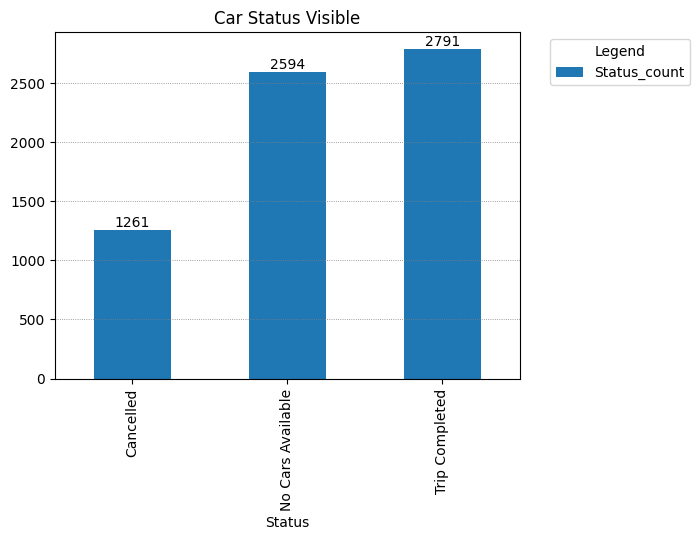

In [39]:
df_carStat_Visible= df_opp.groupby('Status').size().reset_index(name ='Status_count').plot.bar(x='Status', 
                        y='Status_count', figsize =(6,4.5),fontsize=10)
plt.title('Car Status Visible')
plt.legend(title='Legend', bbox_to_anchor =(1.05,1), loc ='upper left')
plt.grid(
    visible =True,
    axis ='y',
    color='gray',
    linestyle=':',
    linewidth=0.6
)
for cols in df_carStat_Visible.containers:
    df_carStat_Visible.bar_label(cols, label_type='edge')

#### *Extracting Dataframe that are Trip Completed:*

In [40]:
df_Stat_Completed=df_opp[df_opp['Status']=='Trip Completed']
df_Stat_Completed.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp_date,Request timestamp_time,Drop timestamp_date,Drop timestamp_time,Pickup point_TimeBin
0,619,Airport,1.0,Trip Completed,2016-11-07,11:51:00,2016-11-07,13:00:00,Late_Morning
1,867,Airport,1.0,Trip Completed,2016-11-07,17:57:00,2016-11-07,18:47:00,Evening


#### *Extracting Dataframe that are No Cars Available:*

In [41]:
df_Stat_No_Cars =df_opp[df_opp['Status']=='No Cars Available']
print(df_Stat_No_Cars.head(2))

      Request id Pickup point  Driver id             Status  \
4103          12         City        NaN  No Cars Available   
4104          16      Airport        NaN  No Cars Available   

     Request timestamp_date Request timestamp_time Drop timestamp_date  \
4103             2016-11-07               01:08:00                 NaT   
4104             2016-11-07               01:09:00                 NaT   

     Drop timestamp_time Pickup point_TimeBin  
4103                 NaT                Night  
4104                 NaT                Night  


In [42]:
## Checking Null values
df_Stat_No_Cars.isna().sum()

Request id                   0
Pickup point                 0
Driver id                 2594
Status                       0
Request timestamp_date       0
Request timestamp_time       0
Drop timestamp_date       2594
Drop timestamp_time       2594
Pickup point_TimeBin         0
dtype: int64

In [43]:
df_Stat_No_Cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2594 entries, 4103 to 6744
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Request id              2594 non-null   int64   
 1   Pickup point            2594 non-null   object  
 2   Driver id               0 non-null      float64 
 3   Status                  2594 non-null   object  
 4   Request timestamp_date  2594 non-null   object  
 5   Request timestamp_time  2594 non-null   object  
 6   Drop timestamp_date     0 non-null      object  
 7   Drop timestamp_time     0 non-null      object  
 8   Pickup point_TimeBin    2594 non-null   category
dtypes: category(1), float64(1), int64(1), object(6)
memory usage: 185.3+ KB


In [44]:
"""
# Dropping the "'Driver id','Pickup point_TimeBin','Drop timestamp_date',Drop timestamp_time" 
columns because these are not required
"""
df_Stat_No_Cars= df_Stat_No_Cars.drop(columns ={'Driver id','Drop timestamp_date','Drop timestamp_time'})
df_Stat_No_Cars.head()

,Request id,Pickup point,Status,Request timestamp_date,Request timestamp_time,Pickup point_TimeBin
4103,12,City,No Cars Available,2016-11-07,01:08:00,Night
4104,16,Airport,No Cars Available,2016-11-07,01:09:00,Night
4105,14,Airport,No Cars Available,2016-11-07,01:10:00,Night
4106,19,City,No Cars Available,2016-11-07,01:14:00,Night
4107,15,City,No Cars Available,2016-11-07,01:15:00,Night


In [45]:
## Renaming the columns 'Pickup point_TimeBin' column
df_Stat_No_Cars= df_Stat_No_Cars.rename (columns= {'Pickup point_TimeBin': 'No Cars_TimeBin'})
df_Stat_No_Cars.head(2)

,Request id,Pickup point,Status,Request timestamp_date,Request timestamp_time,No Cars_TimeBin
4103,12,City,No Cars Available,2016-11-07,01:08:00,Night
4104,16,Airport,No Cars Available,2016-11-07,01:09:00,Night


#### *Extracting Dataframe that are Cancelled:*

In [46]:
df_canceled= df_opp[df_opp['Status']=='Cancelled']
df_canceled.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp_date,Request timestamp_time,Drop timestamp_date,Drop timestamp_time,Pickup point_TimeBin
2831,2905,City,1.0,Cancelled,2016-07-13,06:08:41,NaT,NaT,Mid_Night
2832,4805,City,1.0,Cancelled,2016-07-14,17:07:58,NaT,NaT,Evening


In [47]:
df_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261 entries, 2831 to 4094
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Request id              1261 non-null   int64   
 1   Pickup point            1261 non-null   object  
 2   Driver id               1261 non-null   float64 
 3   Status                  1261 non-null   object  
 4   Request timestamp_date  1261 non-null   object  
 5   Request timestamp_time  1261 non-null   object  
 6   Drop timestamp_date     0 non-null      object  
 7   Drop timestamp_time     0 non-null      object  
 8   Pickup point_TimeBin    1261 non-null   category
dtypes: category(1), float64(1), int64(1), object(6)
memory usage: 90.3+ KB


In [48]:
#removing Unnecesary Columns
df_canceled= df_canceled.drop(columns={'Drop timestamp_date','Drop timestamp_time'}) 
#removing 3 null values

In [49]:
df_canceled= (df_canceled.rename(columns={'Pickup point_TimeBin':'Canceled_TimeBin'})).reset_index(drop =True)
df_canceled.head()

,Request id,Pickup point,Driver id,Status,Request timestamp_date,Request timestamp_time,Canceled_TimeBin
0,2905,City,1.0,Cancelled,2016-07-13,06:08:41,Mid_Night
1,4805,City,1.0,Cancelled,2016-07-14,17:07:58,Evening
2,5202,Airport,1.0,Cancelled,2016-07-14,20:51:37,Late_Evening
3,5927,City,1.0,Cancelled,2016-07-15,10:12:40,Late_Morning
4,2347,Airport,2.0,Cancelled,2016-12-07,19:14:00,Late_Evening


### *Solving the problems:*

#### 1. Identify the Peak Demand Time Periods

In [50]:
df_opp['Request timestamp_date'].isnull().sum()

np.int64(0)

In [51]:
Peak_Demand_Time= df_opp[df_opp['Request timestamp_date']!=np.nan].groupby('Pickup point_TimeBin',
                                                                           observed=False).size().reset_index(name ='Request_count')
Peak_Demand_Time=Peak_Demand_Time.sort_values(by ='Request_count', ascending = False)
Peak_Demand_Time.head()

,Pickup point_TimeBin,Request_count
6,Late_Evening,1414
2,Morning,1260
5,Evening,1087
1,Mid_Night,1046
3,Late_Morning,598


In [52]:

Peak_Demand_TimeAp= df_opp[df_opp['Request timestamp_date']!=np.nan][df_opp['Pickup point']=='Airport'].groupby('Pickup point_TimeBin',
                                                                           observed=False).size().reset_index(name ='Request_count')
Peak_Demand_TimeAp=Peak_Demand_TimeAp.sort_values(by ='Request_count', ascending = False)
Peak_Demand_TimeAp.head()

,Pickup point_TimeBin,Request_count
6,Late_Evening,1087
5,Evening,774
7,Early_Night,281
1,Mid_Night,253
2,Morning,245


In [53]:

Peak_Demand_TimeCity= df_opp[df_opp['Request timestamp_date']!=np.nan][df_opp['Pickup point']=='City'].groupby('Pickup point_TimeBin',
                                                                           observed=False).size().reset_index(name ='Request_count')
Peak_Demand_TimeCity= Peak_Demand_TimeCity.sort_values(by ='Request_count', ascending = False)
Peak_Demand_TimeCity.head()

,Pickup point_TimeBin,Request_count
2,Morning,1015
1,Mid_Night,793
3,Late_Morning,372
6,Late_Evening,327
5,Evening,313


In [54]:
Most_Demand1= pd.merge(Peak_Demand_Time,Peak_Demand_TimeAp, on ='Pickup point_TimeBin', how='outer')
Most_Demand= pd.merge(Most_Demand1,Peak_Demand_TimeCity, on ='Pickup point_TimeBin', how='outer')

In [55]:
Most_Demand= Most_Demand.rename(columns={'Request_count_x':'Request_count','Request_count_y':'Req_count_Ap','Request_count':'Req_count_City'})
Most_Demand.head(2)

,Pickup point_TimeBin,Request_count,Req_count_Ap,Req_count_City
0,Night,276,128,148
1,Mid_Night,1046,253,793


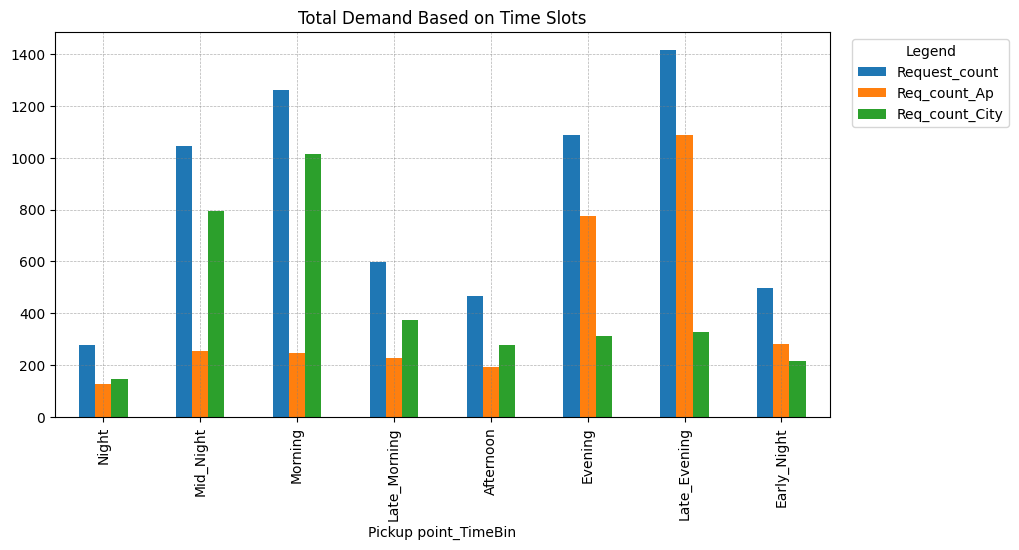

In [56]:
Most_Demand.plot(kind ='bar', x='Pickup point_TimeBin',
                               y=['Request_count','Req_count_Ap','Req_count_City'],
                               figsize =(10,5), grid = True)
plt.legend(title= 'Legend', loc = 'upper left', bbox_to_anchor =(1.02,1))
plt.title('Total Demand Based on Time Slots')
plt.grid(
    visible=True,
    color='gray',        # Grid line color
    linestyle='--',      # Line style: '--', '-.', ':', '-'
    linewidth=0.5,       # Thickness of grid lines
    alpha=0.6,           # Transparency (0–1)
)

 #### 2. Analyze the Supply-Demand Gap

##### *Over all "Late_Evening" and "Morning" time demand is on High*

**By analysing "Peak_Demand_TimeAp" "Peak_Demand_TimeCity"**

***> "Late_Evening" and  "Evening" time demand on Airport is highest***

***> "Morning" and  "Mid_Night" time demand on City is highest***

In [57]:
#GroupBy Howmany Drivers request made
df_opp_Dem= df_opp.groupby(['Pickup point', 'Pickup point_TimeBin'], 
                                 observed=False).agg({'Request timestamp_time':'count'}).reset_index(drop = False)

#GroupBy how many request made but "No Cars Available"
df_opp_DemGap=df_opp[df_opp['Status']=='No Cars Available'].groupby(['Pickup point', 'Pickup point_TimeBin'], 
                                 observed=False).agg({'Request timestamp_time':'count'}).reset_index(drop = False)

In [58]:
print(df_opp_Dem.head(2))
print(df_opp_DemGap.head(2))

  Pickup point Pickup point_TimeBin  Request timestamp_time
0      Airport                Night                     128
1      Airport            Mid_Night                     253
  Pickup point Pickup point_TimeBin  Request timestamp_time
0      Airport                Night                      84
1      Airport            Mid_Night                      41


In [59]:
df_opp_Dem= uber_pivote(df_opp_Dem,'Pickup point_TimeBin', 'Pickup point','Request timestamp_time')
df_opp_Dem =df_opp_Dem.rename(columns= {'Airport':'Airport_Dem','City':'City_Dem'})
df_opp_Dem.head(2)

Pickup point,Pickup point_TimeBin,Airport_Dem,City_Dem
0,Night,128,148
1,Mid_Night,253,793


In [60]:
df_opp_DemGap =uber_pivote(df_opp_DemGap,'Pickup point_TimeBin', 'Pickup point','Request timestamp_time')
df_opp_DemGap=df_opp_DemGap.rename(columns= {'Airport':'Airport_DemGap','City':'City_DemGap'})
df_opp_DemGap.head(2)

Pickup point,Pickup point_TimeBin,Airport_DemGap,City_DemGap
0,Night,84,85
1,Mid_Night,41,203


In [61]:
df_opp_SupDemGap=pd.merge(df_opp_Dem,df_opp_DemGap, how ='inner', on ='Pickup point_TimeBin')
df_opp_SupDemGap

Pickup point,Pickup point_TimeBin,Airport_Dem,City_Dem,Airport_DemGap,City_DemGap
0,Night,128,148,84,85
1,Mid_Night,253,793,41,203
2,Morning,245,1015,14,222
3,Late_Morning,226,372,37,113
4,Afternoon,191,276,41,97
5,Evening,774,313,533,67
6,Late_Evening,1087,327,797,41
7,Early_Night,281,217,136,83


In [62]:
df_opp.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp_date,Request timestamp_time,Drop timestamp_date,Drop timestamp_time,Pickup point_TimeBin
0,619,Airport,1.0,Trip Completed,2016-11-07,11:51:00,2016-11-07,13:00:00,Late_Morning
1,867,Airport,1.0,Trip Completed,2016-11-07,17:57:00,2016-11-07,18:47:00,Evening


In [63]:
#Figureout how many times request done by the passengers
Total_Demand = df_opp.groupby(['Pickup point'])['Pickup point'].count().reset_index(name = 'Request_Count')
Total_Demand

,Pickup point,Request_Count
0,Airport,3185
1,City,3461


In [64]:
#Figureout how many times request done by the passengers no cars was their
Total_NoCars = df_opp[df_opp['Status']=='No Cars Available'].groupby(['Pickup point']).size().reset_index(name = 'NoCars_Request')
Total_NoCars

,Pickup point,NoCars_Request
0,Airport,1683
1,City,911


In [65]:
Total_cancled = df_opp[df_opp['Status']=='Cancelled'].groupby(['Pickup point']).size().reset_index(name = 'Cancel_done')
Total_cancled

,Pickup point,Cancel_done
0,Airport,198
1,City,1063


In [66]:
Total_Demand_Final=pd.merge(Total_Demand,Total_NoCars,how ='inner', on= 'Pickup point')

In [67]:
Total_Demand_Final = pd.merge(Total_Demand_Final,Total_cancled, on= 'Pickup point')

In [68]:
Total_Demand_Final= Total_Demand_Final.rename(columns={'Pickup point':'Request_from'})

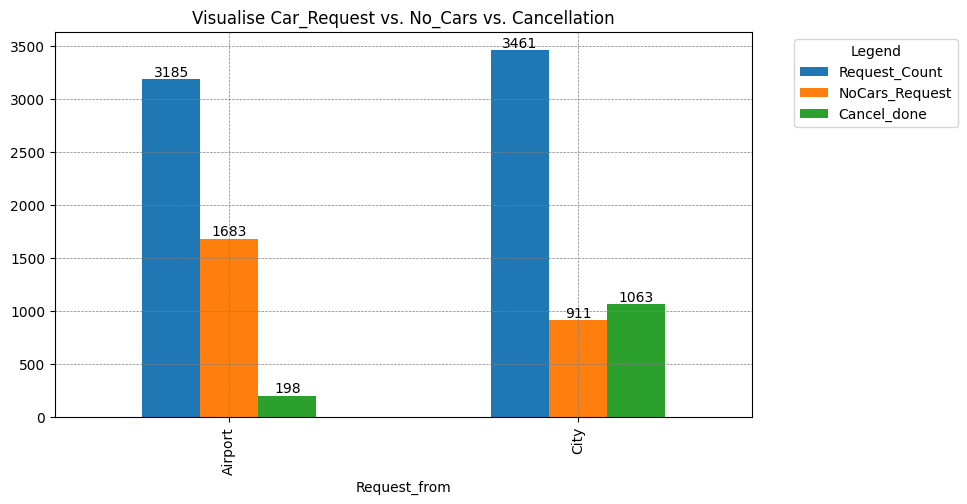

In [69]:
Demand_Final_Visualise= Total_Demand_Final.plot(kind='bar', x='Request_from', 
                        y=['Request_Count','NoCars_Request','Cancel_done'], figsize =(9,5),fontsize=10)
plt.title('Visualise Car_Request vs. No_Cars vs. Cancellation')
plt.legend(title='Legend',loc ='upper left', bbox_to_anchor= (1.05,1))
plt.grid(
    visible =True,
    color='gray',
    linestyle='--',
    linewidth=0.5 
)

for colu in Demand_Final_Visualise.containers:
    Demand_Final_Visualise.bar_label(colu, label_type ='edge')

In [70]:
Total_Demand_Final[['Request_Count','NoCars_Request']].corr()

,Request_Count,NoCars_Request
Request_Count,1.0,-1.0
NoCars_Request,-1.0,1.0


In [71]:
Total_Demand_Final[['Request_Count','Cancel_done']].corr()

,Request_Count,Cancel_done
Request_Count,1.0,1.0
Cancel_done,1.0,1.0


#### 3. Explore Cancellation Patterns:

In [72]:
#finding total cancelled count
df_opp_totalCancelled= df_opp[df_opp['Status']=='Cancelled'].groupby('Pickup point_TimeBin', observed= False)['Pickup point_TimeBin'].count().reset_index(name ='Cancelled_Count' )

In [73]:
Total_Cancelled_Final= df_canceled.groupby(['Canceled_TimeBin', 'Pickup point'],
                    observed= False)['Canceled_TimeBin'].count().reset_index(name ='Cancelled_Count').sort_values(by='Cancelled_Count', ascending = False)
Total_Cancelled_Final.head()

,Canceled_TimeBin,Pickup point,Cancelled_Count
5,Morning,City,507
3,Mid_Night,City,362
7,Late_Morning,City,72
12,Late_Evening,Airport,72
10,Evening,Airport,48


In [74]:
Total_Cancelled_Final= uber_pivote(Total_Cancelled_Final,'Canceled_TimeBin','Pickup point',
                                   'Cancelled_Count').sort_values(by='Airport',
                                                                  ascending =False).rename(columns ={'Airport':'Airport_Cancelled',
                                                                                                     'City':'City_Cancelled'})

Total_Cancelled_Final

Pickup point,Canceled_TimeBin,Airport_Cancelled,City_Cancelled
6,Late_Evening,72,35
5,Evening,48,33
4,Afternoon,26,24
3,Late_Morning,24,72
2,Morning,15,507
1,Mid_Night,10,362
7,Early_Night,3,19
0,Night,0,11


In [75]:
Total_Cancelled_Final=Total_Cancelled_Final.merge(df_opp_totalCancelled, left_on='Canceled_TimeBin', right_on='Pickup point_TimeBin')

In [76]:
Total_Cancelled_Final =Total_Cancelled_Final.drop(columns ='Pickup point_TimeBin')
Total_Cancelled_Final

,Canceled_TimeBin,Airport_Cancelled,City_Cancelled,Cancelled_Count
0,Late_Evening,72,35,107
1,Evening,48,33,81
2,Afternoon,26,24,50
3,Late_Morning,24,72,96
4,Morning,15,507,522
5,Mid_Night,10,362,372
6,Early_Night,3,19,22
7,Night,0,11,11


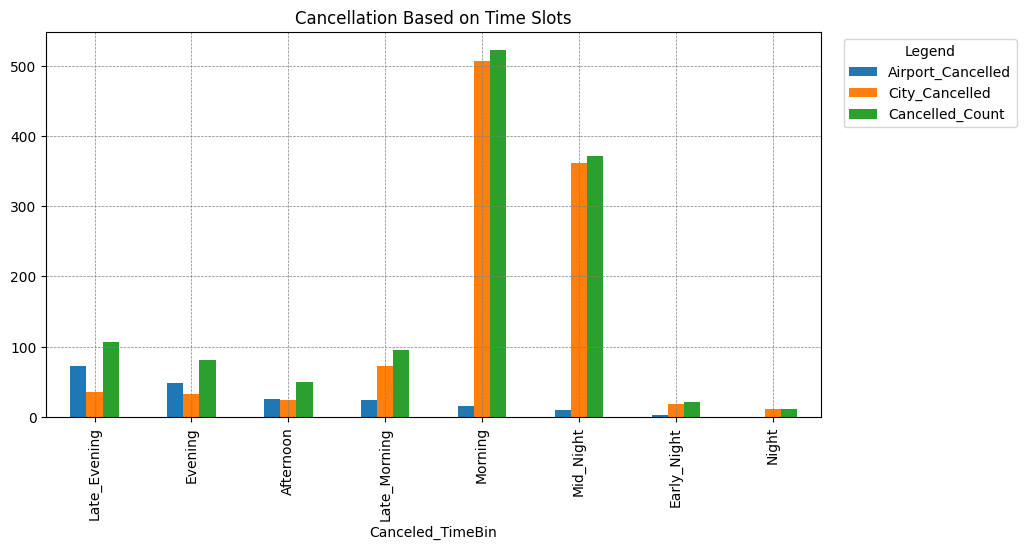

In [77]:
##Identify when and where ride cancellations occur the most.
Total_Cancelled_Final.plot.bar(x='Canceled_TimeBin',
                               y=['Airport_Cancelled','City_Cancelled','Cancelled_Count'],
                               figsize =(10,5), grid = True)
plt.legend(title= 'Legend', loc = 'upper left', bbox_to_anchor =(1.02,1))
plt.title('Cancellation Based on Time Slots')
plt.grid(
    visible = True,
    color='gray', 
    linestyle='--', 
    linewidth=0.5
)

In [78]:
Total_Cancelled_Final[['Airport_Cancelled','City_Cancelled','Cancelled_Count']].corr()

,Airport_Cancelled,City_Cancelled,Cancelled_Count
Airport_Cancelled,1.000000,-0.262531,-0.138256
City_Cancelled,-0.262531,1.000000,0.991953
Cancelled_Count,-0.138256,0.991953,1.000000



**-> By analysing "Total_Demand_Final" most cancelation done in "City: 1066" followed by "Airport:198"**

**-> By analysing "Total_Cancelled_Final" most cancelation done in "City on Morning" followed by "City on Mid_Night"**

**-> On Airport cancelation done most at *"Late_Evening"* followed by *Evening***

#### 4. Investigate "No Cars Available" Issues

In [79]:
df_Stat_Completed.groupby('Pickup point_TimeBin', observed= False)['Pickup point_TimeBin'].count().reset_index(name ='TripComplete_Count' )

,Pickup point_TimeBin,TripComplete_Count
0,Night,96
1,Mid_Night,430
2,Morning,502
3,Late_Morning,352
4,Afternoon,279
5,Evening,406
6,Late_Evening,469
7,Early_Night,257


In [80]:
TripComplete_Driver = df_Stat_Completed.groupby(['Pickup point_TimeBin',
                                                 'Pickup point'], observed= False)['Pickup point_TimeBin'].count().reset_index(name ='TripComplete_Count')
TripComplete_Driver.head()

,Pickup point_TimeBin,Pickup point,TripComplete_Count
0,Night,Airport,44
1,Night,City,52
2,Mid_Night,Airport,202
3,Mid_Night,City,228
4,Morning,Airport,216


In [81]:
TripComplete_Driver = uber_pivote(TripComplete_Driver,'Pickup point_TimeBin','Pickup point',
                                  'TripComplete_Count').reset_index(drop =True)
TripComplete_Driver = TripComplete_Driver.rename(columns={'Airport':'Airport_pickup','City':'City_pickup'})

In [82]:
TripComplete_Driver

Pickup point,Pickup point_TimeBin,Airport_pickup,City_pickup
0,Night,44,52
1,Mid_Night,202,228
2,Morning,216,286
3,Late_Morning,165,187
4,Afternoon,124,155
5,Evening,193,213
6,Late_Evening,218,251
7,Early_Night,142,115


In [83]:
## "OnlyNocars_Df" represent How many times passengers requested but no cars was avilable
OnlyNocars_Df = df_opp_SupDemGap[['Pickup point_TimeBin','Airport_DemGap','City_DemGap']].copy()

In [84]:
No_Cars_Available_Final= pd.merge(TripComplete_Driver,OnlyNocars_Df, on ='Pickup point_TimeBin')
No_Cars_Available_Final

Pickup point,Pickup point_TimeBin,Airport_pickup,City_pickup,Airport_DemGap,City_DemGap
0,Night,44,52,84,85
1,Mid_Night,202,228,41,203
2,Morning,216,286,14,222
3,Late_Morning,165,187,37,113
4,Afternoon,124,155,41,97
5,Evening,193,213,533,67
6,Late_Evening,218,251,797,41
7,Early_Night,142,115,136,83


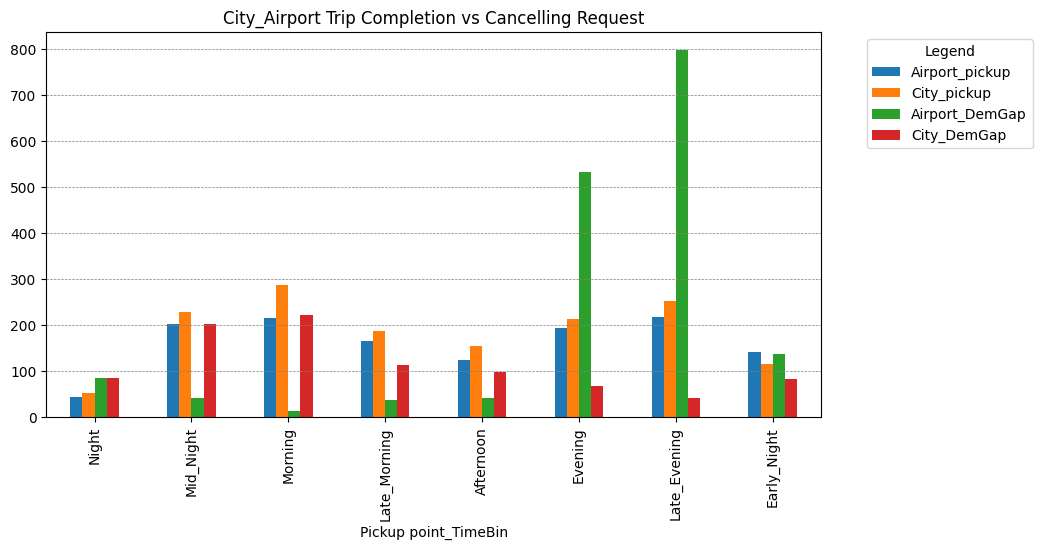

In [85]:
No_Cars_Available_Final.plot.bar(x='Pickup point_TimeBin',y=['Airport_pickup','City_pickup','Airport_DemGap','City_DemGap'], figsize = (10,5))
plt.title('City_Airport Trip Completion vs Cancelling Request')
plt.legend(title='Legend', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(
    visible = True,
    axis = 'y',
    color='gray',
    linestyle='--',
    linewidth=0.5
)

#### Answer:

**Except Cancel Request:**

In "Evening" at Airport only "193" cars are avilable where demand is "533+193"

In "Late_Evening" at Airport only "218" cars are avilable where demand is "797+218"

In "Morning" at City "286" cars are avilable where demand is "222+286"

In "Mid_Night" at City  "228" cars are avilable where demand is "203+228"

#### 5. Measure Average Driving Time (for Completed Rides)

In [86]:
#creating dataframe that only contain "Status" = "Trip Completed" data
df_Driving_Stats= df[df['Status']=='Trip Completed'][['Request id','Request timestamp','Drop timestamp','Pickup point']].copy()
df_Driving_Stats.head()

,Request id,Request timestamp,Drop timestamp,Pickup point
0,619,2016-11-07 11:51:00,2016-11-07 13:00:00,Airport
1,867,2016-11-07 17:57:00,2016-11-07 18:47:00,Airport
2,1807,2016-12-07 09:17:00,2016-12-07 09:58:00,City
3,2532,2016-12-07 21:08:00,2016-12-07 22:03:00,Airport
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47,City


In [87]:
df_Driving_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2831 entries, 0 to 2830
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         2831 non-null   int64         
 1   Request timestamp  2831 non-null   datetime64[ns]
 2   Drop timestamp     2831 non-null   datetime64[ns]
 3   Pickup point       2831 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 110.6+ KB


In [88]:
#Finding the Trip Duration
df_Driving_Stats ['Trip_Duration']= df_Driving_Stats[df_Driving_Stats['Drop timestamp']!=np.nan]['Drop timestamp'] - df_Driving_Stats['Request timestamp']
df_Driving_Stats.head()

,Request id,Request timestamp,Drop timestamp,Pickup point,Trip_Duration
0,619,2016-11-07 11:51:00,2016-11-07 13:00:00,Airport,0 days 01:09:00
1,867,2016-11-07 17:57:00,2016-11-07 18:47:00,Airport,0 days 00:50:00
2,1807,2016-12-07 09:17:00,2016-12-07 09:58:00,City,0 days 00:41:00
3,2532,2016-12-07 21:08:00,2016-12-07 22:03:00,Airport,0 days 00:55:00
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47,City,0 days 00:52:31


In [89]:
#Finding the Trip Duration in minutes
df_Driving_Stats ['Trip_DurationMinutes'] = abs(round((df_Driving_Stats ['Trip_Duration'].dt.total_seconds()/60),2))
df_Driving_Stats.sort_values(by='Trip_DurationMinutes', ascending = False).head()

"""
Few negetive values are present in the "Trip_Duration","Trip_Duration Minutes" beacuse of the wrong entry on "Request timestamp","Drop timestamp"
that's why implement "abs()" on "Trip_DurationMinutes"
"""

'\nFew negetive values are present in the "Trip_Duration","Trip_Duration Minutes" beacuse of the wrong entry on "Request timestamp","Drop timestamp"\nthat\'s why implement "abs()" on "Trip_DurationMinutes"\n'

In [90]:
## Detecting Outliers
Q1=df_Driving_Stats['Trip_DurationMinutes'].quantile(0.25)
Q3=df_Driving_Stats['Trip_DurationMinutes'].quantile(0.75)
IQR =Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Outliers_td= df_Driving_Stats[(df_Driving_Stats['Trip_DurationMinutes']<lower_bound) |
                              (df_Driving_Stats['Trip_DurationMinutes']>Q3 + 1.5 * IQR)]

Outliers_td # No outliers present

,Request id,Request timestamp,Drop timestamp,Pickup point,Trip_Duration,Trip_DurationMinutes
75,1346,2016-11-07 23:39:00,2016-12-07 00:23:00,Airport,29 days 00:44:00,41804.00
133,2675,2016-12-07 23:43:00,2016-07-13 00:35:12,Airport,-148 days +00:52:12,213067.80
143,2661,2016-12-07 23:23:00,2016-07-13 00:27:21,Airport,-148 days +01:04:21,213055.65
245,2667,2016-12-07 23:35:00,2016-07-13 00:40:52,Airport,-148 days +01:05:52,213054.13
390,1353,2016-11-07 23:51:00,2016-12-07 00:34:00,Airport,29 days 00:43:00,41803.00
532,2665,2016-12-07 23:30:00,2016-07-13 00:37:17,Airport,-148 days +01:07:17,213052.72
578,1349,2016-11-07 23:41:00,2016-12-07 00:22:00,Airport,29 days 00:41:00,41801.00
656,2664,2016-12-07 23:26:00,2016-07-13 00:01:12,Airport,-148 days +00:35:12,213084.80
911,1351,2016-11-07 23:44:00,2016-12-07 00:49:00,Airport,29 days 01:05:00,41825.00
927,1344,2016-11-07 23:35:00,2016-12-07 00:39:00,City,29 days 01:04:00,41824.00


<Axes: xlabel='Pickup point', ylabel='Trip_DurationMinutes'>

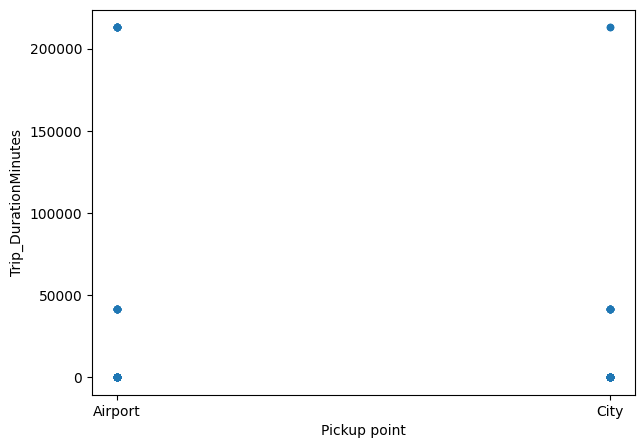

In [91]:
df_Driving_Stats.plot.scatter( y="Trip_DurationMinutes", x="Pickup point", figsize=(7, 5))

In [92]:
## Removing Outliers to get perfect result:
df_Driving_Stats= df_Driving_Stats[(df_Driving_Stats['Trip_DurationMinutes']>lower_bound) &
                              (df_Driving_Stats['Trip_DurationMinutes']<Q3 + 1.5 * IQR)]

In [93]:
# Filtered data
df_Driving_Stats.head()

,Request id,Request timestamp,Drop timestamp,Pickup point,Trip_Duration,Trip_DurationMinutes
0,619,2016-11-07 11:51:00,2016-11-07 13:00:00,Airport,0 days 01:09:00,69.00
1,867,2016-11-07 17:57:00,2016-11-07 18:47:00,Airport,0 days 00:50:00,50.00
2,1807,2016-12-07 09:17:00,2016-12-07 09:58:00,City,0 days 00:41:00,41.00
3,2532,2016-12-07 21:08:00,2016-12-07 22:03:00,Airport,0 days 00:55:00,55.00
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47,City,0 days 00:52:31,52.52


In [94]:
# Adding Request Timestamp Timezone : "Request Timestamp_TimeBin"
df_Driving_Stats=uber_day_bins(df_Driving_Stats,'Request timestamp','Request Timestamp')

C:\Users\user\AppData\Local\Temp\ipykernel_15956\3494047561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[myTime2]= pd.cut(pd.to_datetime(df[myTime], format ="%H:%M:%S").dt.hour,


In [95]:
df_Driving_Stats=df_Driving_Stats.dropna(subset= ['Request Timestamp_TimeBin'])
df_Driving_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2759 entries, 0 to 2830
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Request id                 2759 non-null   int64          
 1   Request timestamp          2759 non-null   datetime64[ns] 
 2   Drop timestamp             2759 non-null   datetime64[ns] 
 3   Pickup point               2759 non-null   object         
 4   Trip_Duration              2759 non-null   timedelta64[ns]
 5   Trip_DurationMinutes       2759 non-null   float64        
 6   Request Timestamp_TimeBin  2759 non-null   category       
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 153.9+ KB


In [96]:
df_Driving_Stats.head()

,Request id,Request timestamp,Drop timestamp,Pickup point,Trip_Duration,Trip_DurationMinutes,Request Timestamp_TimeBin
0,619,2016-11-07 11:51:00,2016-11-07 13:00:00,Airport,0 days 01:09:00,69.00,Late_Morning
1,867,2016-11-07 17:57:00,2016-11-07 18:47:00,Airport,0 days 00:50:00,50.00,Evening
2,1807,2016-12-07 09:17:00,2016-12-07 09:58:00,City,0 days 00:41:00,41.00,Morning
3,2532,2016-12-07 21:08:00,2016-12-07 22:03:00,Airport,0 days 00:55:00,55.00,Late_Evening
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47,City,0 days 00:52:31,52.52,Morning


In [97]:
#Trip Duration in city vs Airport
Trip_Duration_F = df_Driving_Stats[['Pickup point','Request Timestamp_TimeBin','Trip_DurationMinutes']].copy()

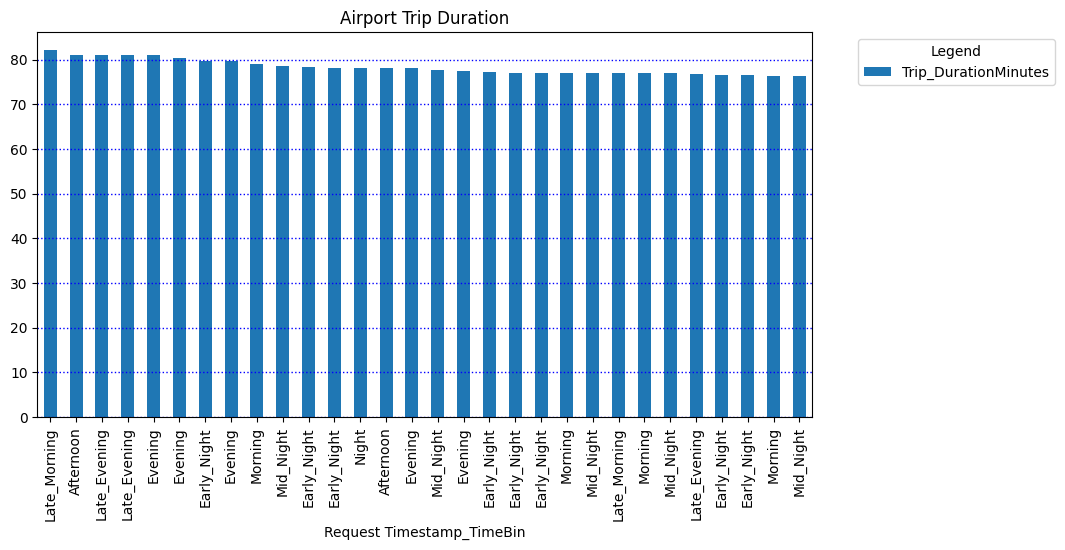

In [98]:
(Trip_Duration_F[Trip_Duration_F['Pickup point']=='Airport'].sort_values(by='Trip_DurationMinutes',
                                                                         ascending = False).head(30)).plot.bar(x='Request Timestamp_TimeBin',
                                                                  y= 'Trip_DurationMinutes', figsize =(10,5))
plt.title('Airport Trip Duration')
plt.legend(title= 'Legend', bbox_to_anchor= (1.05,1), loc = 'upper left')
plt.grid(
    visible = True,
    axis ='y',
    color='b',
    linestyle=':',
    linewidth=1
)

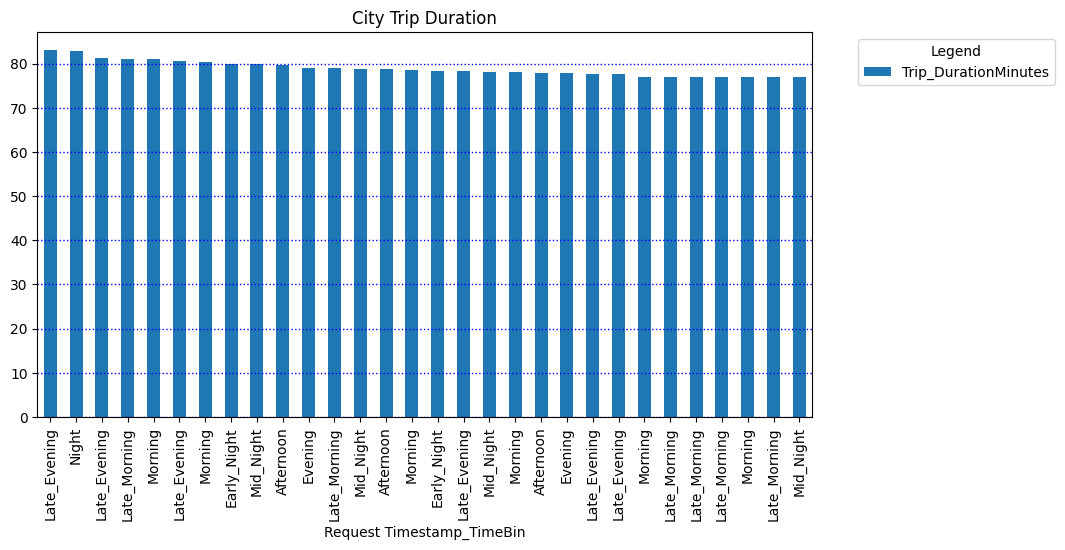

In [99]:
(Trip_Duration_F[Trip_Duration_F['Pickup point']=='City'].sort_values(by='Trip_DurationMinutes',
                                                                         ascending = False).head(30)).plot.bar(x='Request Timestamp_TimeBin',
                                                                  y= 'Trip_DurationMinutes', figsize =(10,5))
plt.title('City Trip Duration')
plt.legend(title= 'Legend', bbox_to_anchor= (1.05,1), loc = 'upper left')
plt.grid(
    visible = True,
    axis ='y',
    color='b',
    linestyle=':',
    linewidth=1
)

In [100]:
# Trip_Duration 'sum','mean','max','min' City vs Airport
Trip_Duration = Trip_Duration_F.pivot_table(index='Request Timestamp_TimeBin',
                                             columns='Pickup point', values='Trip_DurationMinutes',
                                             aggfunc=['sum','mean','max','min'], observed=False)

Trip_Duration

sum                 mean                max  \
Pickup point                Airport      City    Airport       City Airport   
Request Timestamp_TimeBin                                                     
Night                       2385.13   2761.93  54.207500  53.114038   78.05   
Mid_Night                  10495.50  12296.20  51.957921  53.930702   78.48   
Morning                    11106.78  15175.10  51.420278  53.059790   79.00   
Late_Morning                8765.09   9797.36  53.121758  52.392299   82.07   
Afternoon                   6278.14   8222.74  50.630161  53.049935   81.12   
Evening                    10151.95  10770.75  52.600777  50.566901   81.00   
Late_Evening               11363.38  13170.31  52.125596  52.471355   81.12   
Early_Night                 6423.10   5295.65  53.083471  50.919712   79.77   

                                     min         
Pickup point                City Airport   City  
Request Timestamp_TimeBin                        
Night                      82.90   26.25  27.00  
Mid_Night                  79.93   25.00  24.30  
Morning                    81.00   21.18  21.00  
Late_Morning               81.03   23.00  20.78  
Afternoon                  79.63   23.00  21.25  
Evening                    79.10   26.42  23.00  
Late_Evening               83.00   22.00  25.00  
Early_Night                80.00   24.72  25.00

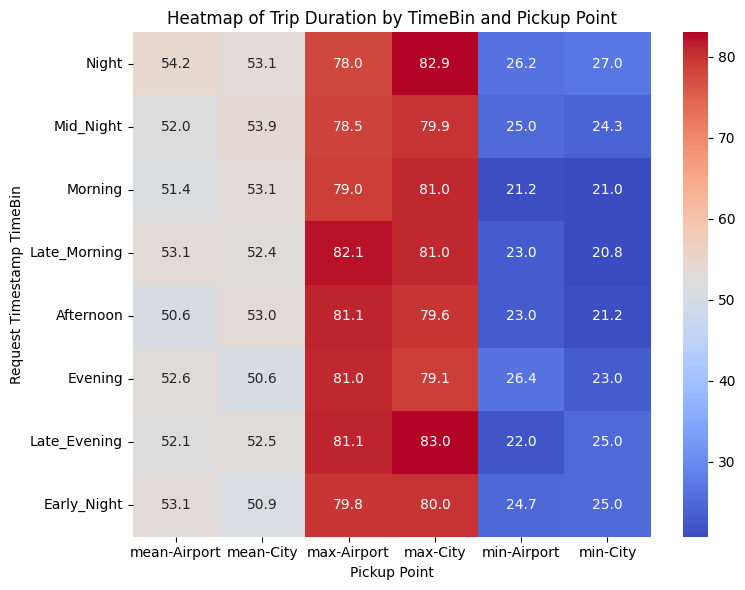

In [101]:
#Heatmap of Trip Duration by TimeBin and Pickup Point
plt.figure(figsize=(8, 6))
sns.heatmap(Trip_Duration[['mean','max', 'min']], annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Heatmap of Trip Duration by TimeBin and Pickup Point')
plt.ylabel('Request Timestamp TimeBin')
plt.xlabel('Pickup Point')
plt.tight_layout()
plt.show()

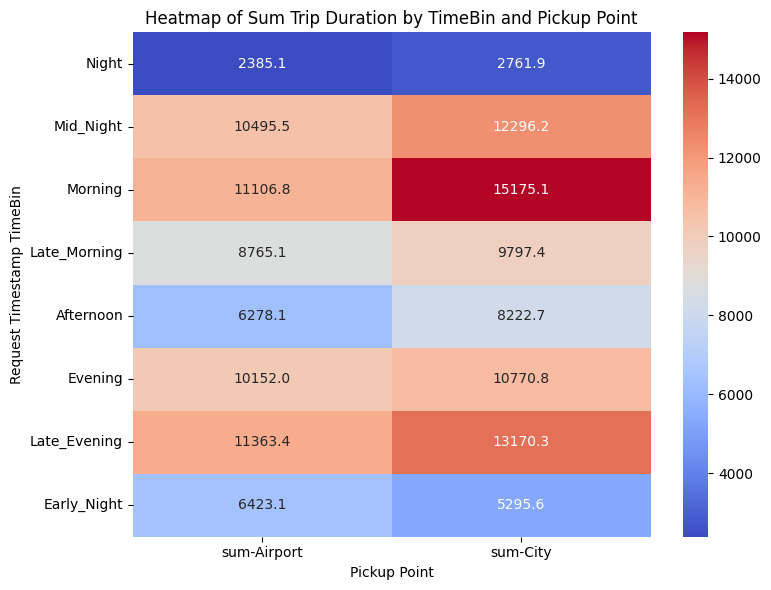

In [102]:
#Heatmap of Sum Trip Duration by TimeBin and Pickup Point
plt.figure(figsize=(8, 6))
sns.heatmap(Trip_Duration[['sum']], annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Heatmap of Sum Trip Duration by TimeBin and Pickup Point')
plt.ylabel('Request Timestamp TimeBin')
plt.xlabel('Pickup Point')
plt.tight_layout()
plt.show()

#### 6. Compare City vs Airport Ride Dynamics:

In [103]:
df_Driving_time_Dynamics = df_Driving_Stats[['Request id','Pickup point','Trip_DurationMinutes']].copy()
# "df_Driving_time_Dynamics" contain only the trip duration data based on Id and location

In [104]:
df_Driving_time_Dynamics = uber_pivote(df_Driving_time_Dynamics,'Request id',
                                       'Pickup point','Trip_DurationMinutes').reset_index(drop =True)
# Piving the "df_Driving_time_Dynamics" for better visulisation

In [105]:
df_Driving_time_Dynamics.head(2)

Pickup point,Request id,Airport,City
0,11,NaN,53.0
1,13,NaN,50.0


In [106]:
df_Driving_time_Dynamics=df_Driving_time_Dynamics.rename(columns ={'Airport':'Airport_DrivTime','City':'City_DrivTime'})
## change the dataframe column name
df_Driving_time_Dynamics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request id        2759 non-null   int64  
 1   Airport_DrivTime  1283 non-null   float64
 2   City_DrivTime     1476 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 64.8 KB


**Null values in "df_Driving_time_Dynamics" arises due to group by "Request id" and "Request id" is unique**

In [107]:
print(f"Max Airport driving time: {df_Driving_time_Dynamics['Airport_DrivTime'].max()}")
print(f"Max City driving time: {df_Driving_time_Dynamics['City_DrivTime'].max()}")
print()
print(f"Min Airport driving time: {df_Driving_time_Dynamics['Airport_DrivTime'].min()}")
print(f"Min City driving time: {df_Driving_time_Dynamics['City_DrivTime'].min()}")
print()
print(f"Agerage Airport driving time: {df_Driving_time_Dynamics['Airport_DrivTime'].mean()}")
print(f"Agerage City driving time: {df_Driving_time_Dynamics['City_DrivTime'].mean()}")

Max Airport driving time: 82.07
Max City driving time: 83.0

Min Airport driving time: 21.18
Min City driving time: 20.78

Agerage Airport driving time: 52.197248636009355
Agerage City driving time: 52.500027100271005


In [108]:
Total_Demand_Final.head()

,Request_from,Request_Count,NoCars_Request,Cancel_done
0,Airport,3185,1683,198
1,City,3461,911,1063


In [109]:
#Measuring Supply Gap 'Cancel' request can be done by customers or drivers
#Request_Count-NoCars_Request
## Measuring Supply Gap at Airport
supply_gaps_Airport = Total_Demand_Final[Total_Demand_Final['Request_from']=='Airport']['NoCars_Request']
print(f"Supply gap at Airport: {supply_gaps_Airport}")

## Measuring Supply Gap in City
supply_gaps_City = Total_Demand_Final[Total_Demand_Final['Request_from']=='City']['NoCars_Request']
print(f"Supply gap in City: {supply_gaps_City}")

Supply gap at Airport: 0    1683
Name: NoCars_Request, dtype: int64
Supply gap in City: 1    911
Name: NoCars_Request, dtype: int64


##### Measuring Supply Gap based on the TimeBin:

In [110]:
df_opp_SupDemGap.head()

Pickup point,Pickup point_TimeBin,Airport_Dem,City_Dem,Airport_DemGap,City_DemGap
0,Night,128,148,84,85
1,Mid_Night,253,793,41,203
2,Morning,245,1015,14,222
3,Late_Morning,226,372,37,113
4,Afternoon,191,276,41,97


In [111]:
## Measuring Supply Gap at Airport:
df_opp_SupDemGap['Ap_Demand_Gap'] = df_opp_SupDemGap['Airport_DemGap']
## Measuring Supply Gap in city:
df_opp_SupDemGap['ct_Demand_Gap'] = df_opp_SupDemGap['City_DemGap']

In [112]:
#Total demand gap
Supply_Gap_TimeBin = df_opp_SupDemGap[['Pickup point_TimeBin','Ap_Demand_Gap','ct_Demand_Gap']].copy()

In [113]:
Supply_Gap_TimeBin.head(10)

Pickup point,Pickup point_TimeBin,Ap_Demand_Gap,ct_Demand_Gap
0,Night,84,85
1,Mid_Night,41,203
2,Morning,14,222
3,Late_Morning,37,113
4,Afternoon,41,97
5,Evening,533,67
6,Late_Evening,797,41
7,Early_Night,136,83


In [114]:
#Driver Demand
Driver_demand_Airport = df_opp[df_opp['Pickup point']== 'Airport'].groupby('Request id')['Request id'].count().sum()
print(f"Driver Demand in Airport: {Driver_demand_Airport}")
 
# Driver_demand_City
Driver_demand_City = df_opp[df_opp['Pickup point']== 'City'].groupby('Request id')['Request id'].count().sum()
print(f"Driver Demand in City: {Driver_demand_City}")
print() 

#cancellation rates In Airport 
cancellation_rates_Airport= (Total_Demand_Final[Total_Demand_Final['Request_from']=='Airport']['Cancel_done']/Total_Demand_Final[Total_Demand_Final['Request_from']=='Airport']['Request_Count'])*100
print(f"Cancelation rate in Airport: {cancellation_rates_Airport}")

##cancellation rates In City
cancellation_rates_City= (Total_Demand_Final[Total_Demand_Final['Request_from']=='City']['Cancel_done']/Total_Demand_Final[Total_Demand_Final['Request_from']=='City']['Request_Count'])*100
print(f"Cancelation rate in City: {cancellation_rates_City}")
print() 

#No driver/cars Avilable rates In Airport 
NoDriversCars_Airport= (Total_Demand_Final[Total_Demand_Final['Request_from']=='Airport']['NoCars_Request']/Total_Demand_Final[Total_Demand_Final['Request_from']=='Airport']['Request_Count'])*100
print(f"No driver/cars Avilable rate in Airport: {NoDriversCars_Airport}")

#No driver/cars Avilable rates In City
NoDriversCars_City=  (Total_Demand_Final[Total_Demand_Final['Request_from']=='City']['NoCars_Request']/Total_Demand_Final[Total_Demand_Final['Request_from']=='City']['Request_Count'])*100
print(f"No driver/cars Avilable rate in City: {NoDriversCars_City}")

Driver Demand in Airport: 3185
Driver Demand in City: 3461

Cancelation rate in Airport: 0    6.216641
dtype: float64
Cancelation rate in City: 1    30.713667
dtype: float64

No driver/cars Avilable rate in Airport: 0    52.841444
dtype: float64
No driver/cars Avilable rate in City: 1    26.321872
dtype: float64


In [115]:
TripComplete_Driver.head()

Pickup point,Pickup point_TimeBin,Airport_pickup,City_pickup
0,Night,44,52
1,Mid_Night,202,228
2,Morning,216,286
3,Late_Morning,165,187
4,Afternoon,124,155


#### 7. Understand Impact of Time Slots

In [116]:
Supply_Gap_TimeBin.head()

Pickup point,Pickup point_TimeBin,Ap_Demand_Gap,ct_Demand_Gap
0,Night,84,85
1,Mid_Night,41,203
2,Morning,14,222
3,Late_Morning,37,113
4,Afternoon,41,97


Text(0.5, 1.0, 'Demand Gap Based on Time Slots')

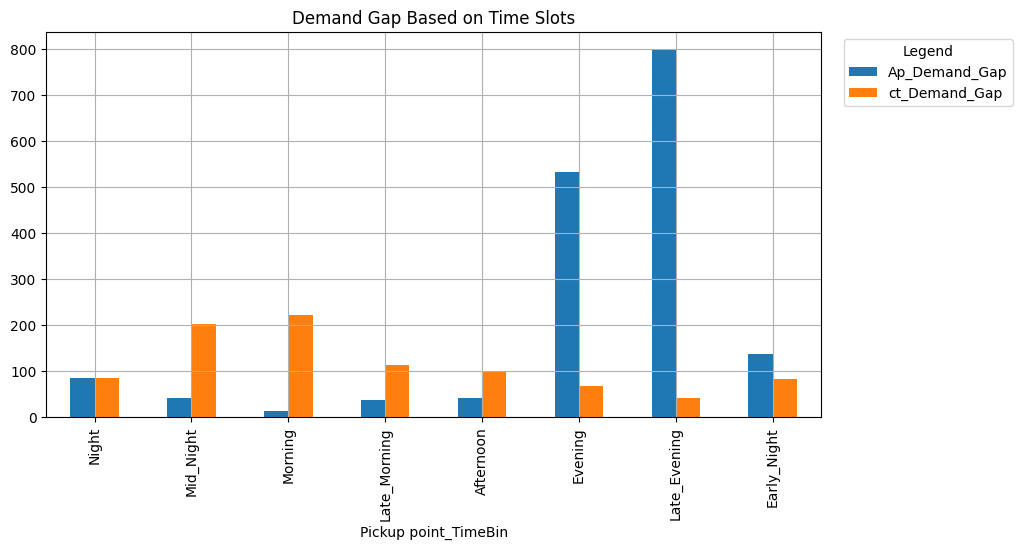

In [117]:
# Shortage of supply Visualisation
Supply_Gap_TimeBin.plot.bar(x='Pickup point_TimeBin',
                               y=['Ap_Demand_Gap','ct_Demand_Gap'],
                               figsize =(10,5), grid = True)
plt.legend(title= 'Legend', loc = 'upper left', bbox_to_anchor =(1.02,1))
plt.title('Demand Gap Based on Time Slots')

**Which parts of the day need service improvement?**

In [118]:
Total_Cancelled_Final

,Canceled_TimeBin,Airport_Cancelled,City_Cancelled,Cancelled_Count
0,Late_Evening,72,35,107
1,Evening,48,33,81
2,Afternoon,26,24,50
3,Late_Morning,24,72,96
4,Morning,15,507,522
5,Mid_Night,10,362,372
6,Early_Night,3,19,22
7,Night,0,11,11


Text(0.5, 1.0, 'Cancellation Based on Time Slots')

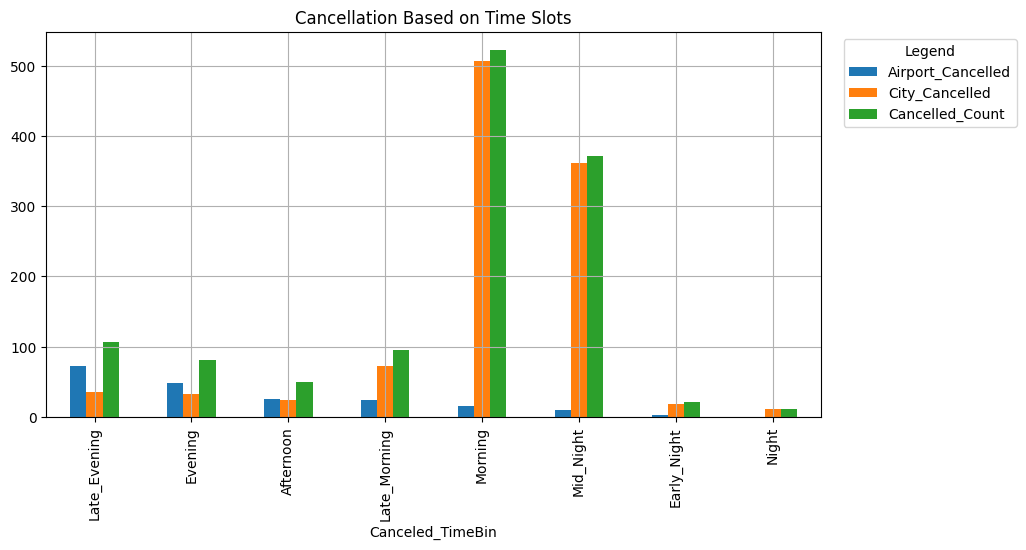

In [119]:
#Visualise Cancellation Based on Time Slots
Total_Cancelled_Final.plot.bar(x='Canceled_TimeBin',
                               y=['Airport_Cancelled','City_Cancelled', 'Cancelled_Count'],
                               figsize =(10,5), grid = True)
plt.legend(title= 'Legend', loc = 'upper left', bbox_to_anchor =(1.02,1))
plt.title('Cancellation Based on Time Slots')

***Most of the cancellation done on city during Morning, Mid Night***

#### *Comparing drivers avilability with Other Aspects*

In [120]:
#Checking Driver Stat
## df_opp['Driver id']= 0 Represent "No cars Available"
df_driver = df_opp[df_opp['Driver id'].notna() & (df_opp['Driver id']!='NA') & (df_opp['Driver id']!= 0)].copy()
df_driver['Driver id'] = (df_driver['Driver id'].astype(dtype ='int64')).astype(dtype ='str')

In [121]:
df_driver_stat =df_driver.groupby(['Driver id','Pickup point','Pickup point_TimeBin'], observed = False).agg({'Driver id':'count'})

In [122]:
df_driver_stat= df_driver_stat.rename(columns ={'Driver id':'Driver_Count'})
df_driver_stat.head()
# "df_driver_stat" represent  drivers present at which types of pickup point at what time 

Driver_Count
Driver id Pickup point Pickup point_TimeBin              
1         Airport      Night                            0
                       Mid_Night                        2
                       Morning                          0
                       Late_Morning                     1
                       Afternoon                        0

In [123]:
df_driver_TmZ =df_driver.groupby(['Pickup point',
                                  'Pickup point_TimeBin'], observed = False).agg({'Driver id':'count'}).reset_index(drop= False)
df_driver_TmZ.head()

,Pickup point,Pickup point_TimeBin,Driver id
0,Airport,Night,44
1,Airport,Mid_Night,212
2,Airport,Morning,231
3,Airport,Late_Morning,189
4,Airport,Afternoon,150


In [124]:
df_driver_TmZ = uber_pivote(df_driver_TmZ,'Pickup point_TimeBin','Pickup point','Driver id')

In [125]:
df_driver_TmZ= df_driver_TmZ.rename(columns={'Airport':'DriversAtAirport','City':'DriversAtCity'})
df_driver_TmZ.head()

"""
DriversAtAirport: Represent drivers numbers at Airport (few drivers may serve multiple times in different time slots)
DriversAtCity: Represent drivers numbers at City (few drivers may serve multiple times in different time slots)
"""

'\nDriversAtAirport: Represent drivers numbers at Airport (few drivers may serve multiple times in different time slots)\nDriversAtCity: Represent drivers numbers at City (few drivers may serve multiple times in different time slots)\n'

##### Comparing drivers avilability with No Drivers stat

In [126]:
df_No_CarsTmz= df_Stat_No_Cars.groupby (['Pickup point','No Cars_TimeBin'], observed= False).agg({'Request timestamp_date':'count'}).reset_index(drop= False)

In [127]:
df_No_CarsTmz = (uber_pivote(df_No_CarsTmz, 
                           'No Cars_TimeBin',
                           'Pickup point','Request timestamp_date')).rename(columns={'Airport':'Ap_NoDrivers','City':'City_NoDrivers'})
df_No_CarsTmz.head()

Pickup point,No Cars_TimeBin,Ap_NoDrivers,City_NoDrivers
0,Night,84,85
1,Mid_Night,41,203
2,Morning,14,222
3,Late_Morning,37,113
4,Afternoon,41,97


In [128]:
driver_TmZComp = df_driver_TmZ.merge(df_No_CarsTmz, left_on= 'Pickup point_TimeBin', right_on ='No Cars_TimeBin')

In [129]:
driver_TmZComp=driver_TmZComp.drop(columns ='No Cars_TimeBin')

In [130]:
driver_TmZComp.head()
"""
Ap_NoDrivers: Number of "NO" car found at Airport but paasengers are requested
City_NoDrivers: Number of "NO" car found at City but paasengers are requested
""" 

'\nAp_NoDrivers: Number of "NO" car found at Airport but paasengers are requested\nCity_NoDrivers: Number of "NO" car found at City but paasengers are requested\n'

### What all manipulations have you done and insights you found?

Answer Here.

Changing the "Request timestamp" and "Drop timestamp" datatypes to datetime[ns].

Create Timebins based on the "Request timestamp_time".

Create a copy of the main dataframe for performing the operations, without chainging much the dataframes.

Identify when and where ride cancellations occur the most.

Compare request patterns, cancellation rates, and supply gaps between City and Airport.

Calculate time between Request timestamp and Drop timestamp based on the pandas datetime substraction.

Figuureout peak times when users are not getting rides due to no available drivers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [131]:
# Chart - 1 visualization code

Text(0.5, 1.0, 'Driver Stats Visualise')

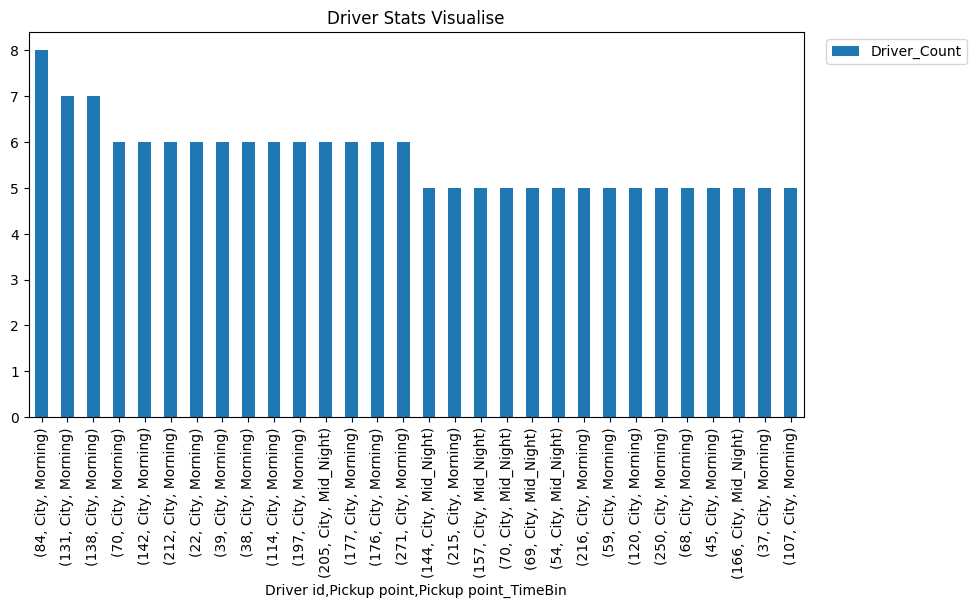

In [132]:
df_driver_stat.sort_values(by= 'Driver_Count', ascending = False).head(30).plot.bar(y='Driver_Count',figsize =(10,5))
plt.legend(title ='', bbox_to_anchor =(1.02,1), loc ='upper left')
plt.title('Driver Stats Visualise')

##### 1. Why did you pick the specific chart?

Bar chart better for stat number visulisation

##### 2. What is/are the insight(s) found from the chart?

Which drivers present at which types of pickup point at what time slot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
By comparing with "df_driver" visualisation and chart 1

Which drivers present at which types of pickup point at what time slot give overview of the those drivers those can get incentive for not serving in the city on Morning and Mid Night

In [133]:
#Which drivers are preset Neither in Morning Nor In Mid_Night at city - those who can be targeted for incentives

df_driver[(df_driver['Pickup point'] == 'City') &(~df_driver['Pickup point_TimeBin'].isin(['Morning', 'Mid_Night']))
][['Driver id', 'Pickup point', 'Pickup point_TimeBin']]

,Driver id,Pickup point,Pickup point_TimeBin
8,1,City,Evening
11,2,City,Late_Morning
14,2,City,Afternoon
16,2,City,Late_Morning
25,3,City,Late_Evening
...,...,...,...
4057,290,City,Late_Morning
4061,291,City,Night
4071,295,City,Late_Evening
4074,295,City,Early_Night


In [134]:
#Which drivers are preset Neither in 'Evening', 'Late_Evening','Early_Night' at Airpot - those who can be targeted for incentives

df_driver[(df_driver['Pickup point'] == 'Airport') &(~df_driver['Pickup point_TimeBin'].isin(['Evening', 'Late_Evening','Early_Night']))
][['Driver id', 'Pickup point', 'Pickup point_TimeBin']]

,Driver id,Pickup point,Pickup point_TimeBin
0,1,Airport,Late_Morning
6,1,Airport,Mid_Night
7,1,Airport,Mid_Night
10,2,Airport,Mid_Night
12,2,Airport,Mid_Night
...,...,...,...
3978,274,Airport,Morning
4038,286,Airport,Morning
4046,287,Airport,Late_Morning
4049,288,Airport,Afternoon


#### Chart - 2

In [135]:
# Chart - 3 Comparing drivers avilability with NO Drivers stat
df_driver_TmZ.head()

Pickup point,Pickup point_TimeBin,DriversAtAirport,DriversAtCity
0,Night,44,63
1,Mid_Night,212,590
2,Morning,231,793
3,Late_Morning,189,259
4,Afternoon,150,179


In [136]:
driver_TmZComp.head(2)

Pickup point,Pickup point_TimeBin,DriversAtAirport,DriversAtCity,Ap_NoDrivers,City_NoDrivers
0,Night,44,63,84,85
1,Mid_Night,212,590,41,203


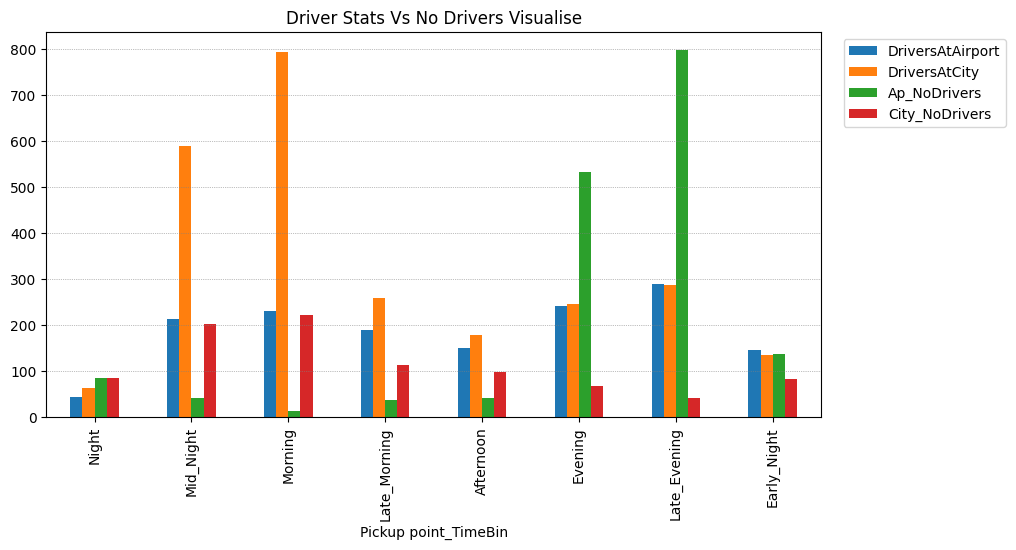

In [137]:
driver_TmZComp.plot.bar(x='Pickup point_TimeBin', 
                        y= ['DriversAtAirport','DriversAtCity','Ap_NoDrivers','City_NoDrivers'],
                        figsize =(10,5))
plt.legend(title ='', bbox_to_anchor =(1.02,1), loc ='upper left')
plt.title('Driver Stats Vs No Drivers Visualise')
plt.grid(visible = True,
         axis='y',
         color='gray',
         linestyle=':',
         linewidth= 0.5)

##### 1. Why did you pick the specific chart?

Bar chart better for stat number visulisation and comparison

##### 2. What is/are the insight(s) found from the chart?

By checking the graph Uber can gime most of the incentives and increases diver listing at 


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:

By checking the graph Uber can gime most of the incentives and increases diver listing at 

Airport on ***"Late Evening"***, ***"Late Evening"***

City on ***"Morning"***, ***"Mid Night"***

#### Chart - 3

In [138]:
# Chart - 4 visualization code for Car Request Per Hour
df_oppH= df_opp[df_opp['Status'].notna()][['Pickup point', 'Status','Request timestamp_time', 'Pickup point_TimeBin']].copy()
df_oppH['Hour_Count']= pd.to_datetime(df_oppH['Request timestamp_time'], format ="%H:%M:%S").dt.hour
df_oppH.head()
# pd.to_datetime(df_opp [myTime], format ="%H:%M:%S").dt.hour

,Pickup point,Status,Request timestamp_time,Pickup point_TimeBin,Hour_Count
0,Airport,Trip Completed,11:51:00,Late_Morning,11
1,Airport,Trip Completed,17:57:00,Evening,17
2,City,Trip Completed,09:17:00,Morning,9
3,Airport,Trip Completed,21:08:00,Late_Evening,21
4,City,Trip Completed,08:33:16,Morning,8


In [139]:
df_oppHneW= df_oppH[df_oppH['Request timestamp_time'].notna()].groupby(['Hour_Count',
                                                            'Pickup point'])['Request timestamp_time'].count().reset_index(drop = False)

In [140]:
df_oppHneW= uber_pivote(df_oppHneW,'Hour_Count', 'Pickup point','Request timestamp_time')

In [141]:
df_oppHneW.head()
"""
Airport: Here this column represent how many car request made by the passengers at Airport in each hour (Hours is here in 24 hours format)
City: Here this column represent how many car request made by the passengers at Airport in each hour (Hours is here in 24 hours format)
"""

'\nAirport: Here this column represent how many car request made by the passengers at Airport in each hour (Hours is here in 24 hours format)\nCity: Here this column represent how many car request made by the passengers at Airport in each hour (Hours is here in 24 hours format)\n'

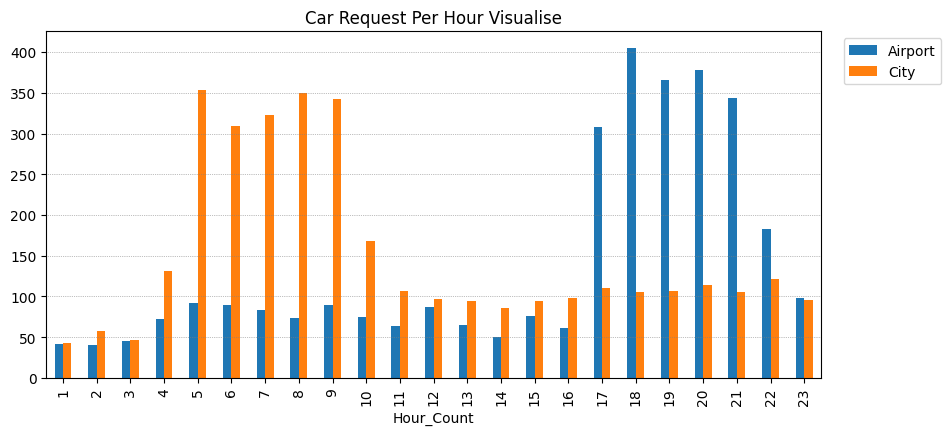

In [142]:
df_oppHneW.plot.bar(x='Hour_Count', y=['Airport','City'], figsize =(10,4.5))
plt.legend(title ='', bbox_to_anchor =(1.02,1), loc ='upper left')
plt.title('Car Request Per Hour Visualise')
plt.grid(visible = True,
         axis='y',
         color='gray',
         linestyle=':',
         linewidth= 0.5)

##### 1. Why did you pick the specific chart?

Bar chart better for stat number visulisation and comparison

##### 2. What is/are the insight(s) found from the chart?

Which hour how many car requests are made at what place

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart will also help to clasify at which hour how many car requests are made and these data will help uber fior driver dristribution

Maximum car request on airport from 5pm to 11pm

Maximum car request on city from 4am to 10am

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.
The Drivers those are not serving in the city at 'Morning', 'Mid_Night' they can be promoted for incentives
The Drivers those are not serving in the airport at 'Evening', 'Late_Evening','Early_Night' they can be promoted for incentives

Or Uber can give extra incentives when drivers will served at 'Morning', 'Mid_Night' in city or at 'Evening', 'Late_Evening','Early_Night' in Airport.

# **Conclusion**

Or Uber can give extra incentives when drivers will served at 'Morning', 'Mid_Night' in city or at 'Evening', 'Late_Evening','Early_Night' in Airport.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***